(280, 16)

,CountyCode,Year,medianFamilyIncome,medianHomeVal,medianHouseIncome,medianHouseholdCosts,medianNonFamIncome,medianRealEstateTax,medianWorkerIncome,population,totalHouses,workers,meanIncome,medianAge,medianIncome,povertyPop
79,1,2013-01-01,51779,139800,42512,750,22976,1038,25773,154378,38808,74339,59200,39,59200,10517
80,19,2013-01-01,56834,195100,47334,867,25831,1151,25083,115301,35759,50149,48444,49,48444,8530
81,21,2013-01-01,60686,193500,46431,849,30360,1375,27117,247912,63391,128164,100980,41,100980,12194
82,23,2013-01-01,48167,113500,33379,590,19937,814,23171,89842,23945,41800,34484,42,34484,9357
83,25,2013-01-01,67893,168400,54307,989,32388,1555,32261,187226,46480,97188,65725,37,65725,8775
84,27,2013-01-01,45588,105600,32386,606,19007,856,25313,81990,21202,35357,29255,43,29255,5992
85,31,2013-01-01,53057,189600,45231,799,28720,987,24598,68434,22385,32704,29961,46,29961,4198
86,35,2013-01-01,54711,142500,42859,687,25796,943,25826,154810,39559,76345,58835,40,58835,7991
87,37,2013-01-01,70413,237200,56550,852,26984,1896,30463,66817,19939,29865,26593,46,26593,4380
88,45,2013-01-01,48680,98800,40581,619,20600,917,25805,97047,26290,49104,38409,41,38409,10413


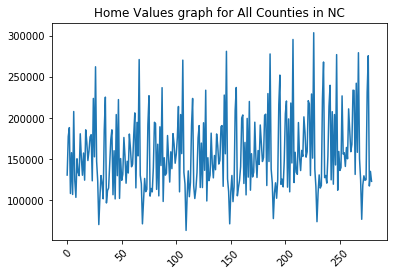

KeyError: 1

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML, display_html
import datetime
import os
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker


#Set Formatting
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

#Connect to DB
path = os.path.abspath("MinorLeague.db")
Base = declarative_base()
engine = create_engine("sqlite:///"+path, echo = False)
conn = engine.connect()
metadata = Base.metadata
Session = sessionmaker(bind=engine)
session = Session()

#Read in the data
df = pd.read_sql_table('NC', conn)

#To remove any columns from the data
df = df.drop(['StateCode'], axis = 1)
#df = df.drop(['CountyCode'], axis = 1)

#Convert the Year column to a datetime datatype
df['Year'] = pd.to_datetime(df.Year, format='%Y')

#Convert the StateCode and CountyCode to numbers
#df['StateCode'] = pd.to_numeric(df['StateCode'], errors='coerce').fillna(0)
df['CountyCode'] = pd.to_numeric(df['CountyCode'], errors='coerce').fillna(0)

#Display the shape of the data
display(df.shape)
#Display the dataypes of the columns
#display(df.dtypes)
#Display all of the data
#display(df)

#Group data by and CountyCode
df = df.groupby(by = 'CountyCode')

#Change index to datetime
#df_example.index = pd.to_datetime(df_example.index)

#Set frequency of time series
#df_example = df_example.asfreq(freq='1Y')

#Sort the values
#df_example = df_example.sort_index(ascending = True)

#Show the end of the data
display(df_example.tail())

#Plot the data
f, ax = plt.subplots(1,1)
ax.plot(df['medianHomeVal'])

#Title
ax.set_title('Home Values graph for All Counties in NC')

#Rotate x-labels
ax.tick_params(axis = 'x', rotation = 45)

#Show graph
plt.show()
plt.close()


